In [1]:
import pandas as pd 

In [2]:
#import shootings csv file to DataFrame
data = pd.read_csv('fatal-police-shootings-data.csv') 
data 

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,9147,2023-04-22,point,not,gun,Mesquite,Dallas,TX,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,False,False,NaN
8406,9149,2023-04-22,shoot,NaN,gun,West Jordan,Salt Lake,UT,40.593788,-111.969553,address,NaN,NaN,male,NaN,NaN,False,False,751
8407,9144,2023-04-23,NaN,NaN,undetermined,Pineville,Rapides,LA,31.207175,-92.149489,block,NaN,NaN,NaN,NaN,NaN,False,False,21677
8408,9153,2023-04-23,attack,not,unknown,Shreveport,Caddo,LA,32.435405,-93.783105,intersection,Joseph Dewayne Taylor,33.0,male,B,public_record,False,False,772


In [3]:
data.dtypes

id                              int64
date                           object
threat_type                    object
flee_status                    object
armed_with                     object
city                           object
county                         object
state                          object
latitude                      float64
longitude                     float64
location_precision             object
name                           object
age                           float64
gender                         object
race                           object
race_source                    object
was_mental_illness_related       bool
body_camera                      bool
agency_ids                     object
dtype: object

In [4]:
#dropping unnecessary columns
data_clean = data.drop(columns=['latitude', 'longitude', 'location_precision', 'threat_type', 'flee_status', 
                                'race_source', 'was_mental_illness_related', 'body_camera', 'county'])
data_clean

,id,date,armed_with,city,state,name,age,gender,race,agency_ids
0,3,2015-01-02,gun,Shelton,WA,Tim Elliot,53.0,male,A,73
1,4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47.0,male,W,70
2,5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,238
3,8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32.0,male,W,196
4,9,2015-01-04,other,Evans,CO,Michael Rodriguez,39.0,male,H,473
...,...,...,...,...,...,...,...,...,...,...
8405,9147,2023-04-22,gun,Mesquite,TX,NaN,NaN,male,NaN,NaN
8406,9149,2023-04-22,gun,West Jordan,UT,NaN,NaN,male,NaN,751
8407,9144,2023-04-23,undetermined,Pineville,LA,NaN,NaN,NaN,NaN,21677
8408,9153,2023-04-23,unknown,Shreveport,LA,Joseph Dewayne Taylor,33.0,male,B,772


In [5]:
pd.unique(data_clean['gender'])

array(['male', 'female', nan, 'non-binary'], dtype=object)

In [6]:
pd.unique(data_clean['race'])

array(['A', 'W', 'H', 'B', 'O', nan, 'N', 'B;H'], dtype=object)

In [7]:
#dropped na values from DataFrame
data_clean = data_clean.dropna() 
data_clean

,id,date,armed_with,city,state,name,age,gender,race,agency_ids
0,3,2015-01-02,gun,Shelton,WA,Tim Elliot,53.0,male,A,73
1,4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47.0,male,W,70
2,5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,238
3,8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32.0,male,W,196
4,9,2015-01-04,other,Evans,CO,Michael Rodriguez,39.0,male,H,473
...,...,...,...,...,...,...,...,...,...,...
8397,9142,2023-04-19,gun,Bristol,TN,Casey Eric Crowley,48.0,male,W,2408
8398,9151,2023-04-19,gun,Kansas City,MO,Reginald E. Byers Jr.,43.0,male,B,201
8399,9152,2023-04-20,gun,Indianapolis,IN,Daniel Yefter Ghebrehiwet,46.0,male,B,13886
8408,9153,2023-04-23,unknown,Shreveport,LA,Joseph Dewayne Taylor,33.0,male,B,772


In [8]:
#set datatypes for multiple columns, most notably the date column
data_clean.astype({'age': 'Int64',
                   'id' : 'object',
                   'gender': 'category',
                   'race': 'category',
                  'date': 'datetime64[ns]'}).dtypes

id                    object
date          datetime64[ns]
armed_with            object
city                  object
state                 object
name                  object
age                    Int64
gender              category
race                category
agency_ids            object
dtype: object

In [9]:
#set name as the index for the DataFrame
shootings_df = data_clean.set_index('id')
shootings_df

,date,armed_with,city,state,name,age,gender,race,agency_ids
id,,,,,,,,,
3,2015-01-02,gun,Shelton,WA,Tim Elliot,53.0,male,A,73
4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47.0,male,W,70
5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,238
8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32.0,male,W,196
9,2015-01-04,other,Evans,CO,Michael Rodriguez,39.0,male,H,473
...,...,...,...,...,...,...,...,...,...
9142,2023-04-19,gun,Bristol,TN,Casey Eric Crowley,48.0,male,W,2408
9151,2023-04-19,gun,Kansas City,MO,Reginald E. Byers Jr.,43.0,male,B,201
9152,2023-04-20,gun,Indianapolis,IN,Daniel Yefter Ghebrehiwet,46.0,male,B,13886


In [10]:
#Task 3, Q1
shootings_df.loc[1694]

date                2016-07-06
armed_with                 gun
city            Falcon Heights
state                       MN
name          Philando Castile
age                       32.0
gender                    male
race                         B
agency_ids                1359
Name: 1694, dtype: object

In [11]:
#Task 3, Q2
mn_shootings = shootings_df.loc[shootings_df['state'] == 'MN'] 
mn_shootings

,date,armed_with,city,state,name,age,gender,race,agency_ids
id,,,,,,,,,
60,2015-01-15,gun,Bloomington,MN,Quincy Reed Reindl,24.0,male,W,139
324,2015-01-26,gun,New Hope,MN,Raymond Kmetz,68.0,male,W,1953;109
212,2015-03-16,gun,St. Paul,MN,Justin Tolkinen,28.0,male,W,63
670,2015-07-23,unarmed,Plymouth,MN,Derek Wolfsteller,31.0,male,W,672
762,2015-08-22,gun,Cohasset,MN,Adam Schneider,31.0,male,W,737
...,...,...,...,...,...,...,...,...,...
7993,2022-04-28,undetermined,Bowlus,MN,Charles Bangs,59.0,male,W,3442;3443
8234,2022-07-13,undetermined,Minneapolis,MN,Andrew Tekle Sundberg,20.0,male,B,109
8289,2022-07-30,blunt_object,Rochester,MN,Joshua Hippler,27.0,male,W,1494


In [12]:
#Task 3, #3
race_df = shootings_df['race'].value_counts() 
race_df

race
W      3501
B      1825
H      1214
A       134
N       107
O        20
B;H       1
Name: count, dtype: int64

In [13]:
#Task 3, #4
black_shootings = shootings_df.loc[shootings_df['race'] == 'B'] 
len(black_shootings) / len(shootings_df['race']) * 100

26.830344016465745

In [14]:
#Task 3, #5
state_df = shootings_df['state'].value_counts() 
state_df

state
CA    901
TX    610
FL    448
AZ    290
GA    260
CO    225
OH    211
NC    209
TN    203
OK    189
MO    181
WA    160
LA    143
PA    142
IN    141
IL    141
VA    133
NM    133
NY    130
AL    124
KY    121
SC    119
MI    116
WI    114
NV    112
OR    108
MD    101
AR     91
MN     83
MS     82
UT     81
KS     76
NJ     75
WV     56
ID     56
MA     48
AK     47
IA     47
MT     45
NE     39
ME     31
HI     31
DC     24
NH     20
WY     20
CT     20
SD     19
ND     17
DE     13
VT     12
RI      4
Name: count, dtype: int64

Text(0.5, 0, 'Race')

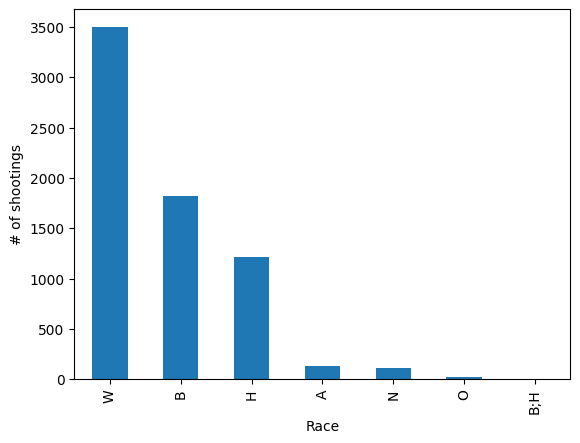

In [15]:
#Task 3, Q6A
import matplotlib.pyplot as plt 

race_df.plot(kind="bar") 
plt.ylabel("# of shootings") 
plt.xlabel("Race")

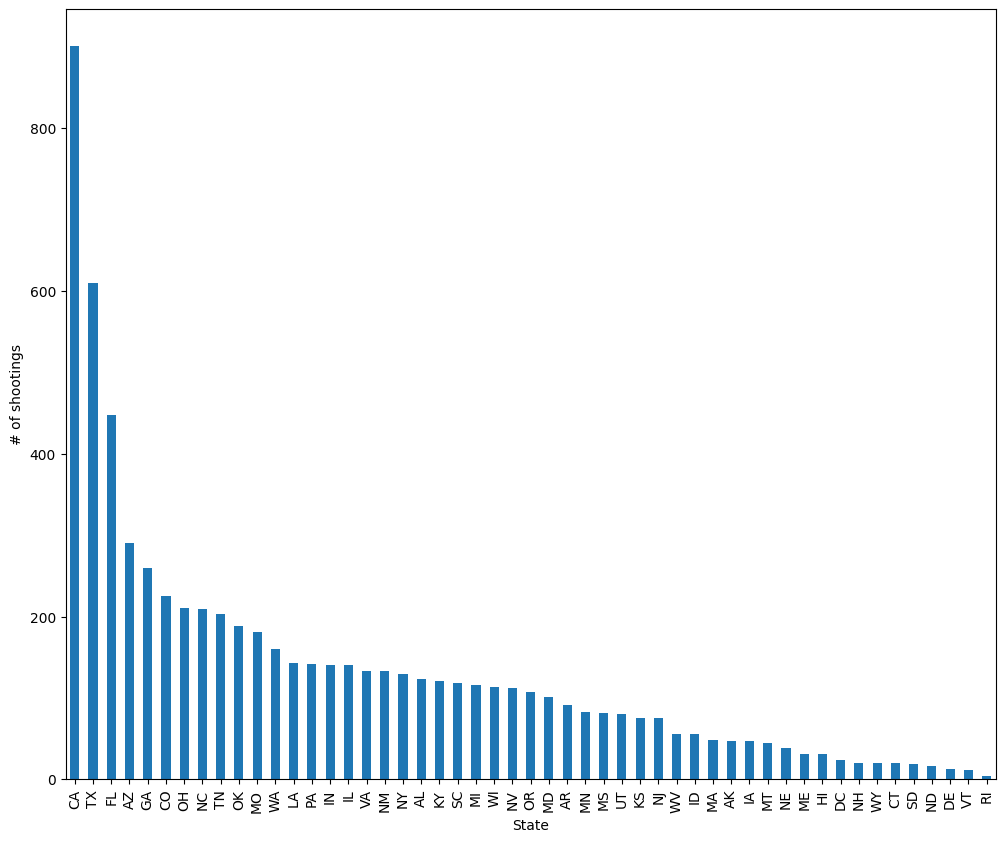

In [16]:
#Task 3, Q6B 
plt.figure(figsize=(12,10))
state_df.plot(kind="bar")  
plt.ylabel("# of shootings") 
plt.xlabel("State") 
plt.show()

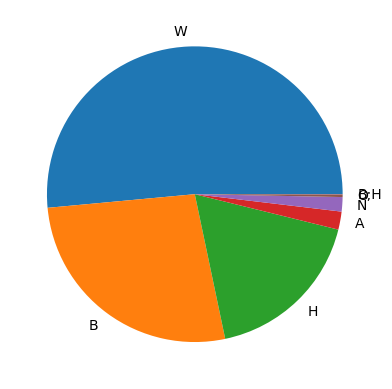

In [17]:
#Task 3, Q7 
plt.pie(race_df.values, labels=race_df.index) 
plt.show()

In [18]:
#filter shooting data for unarmed subjects
unarmed_df = shootings_df.loc[shootings_df['armed_with'] == 'unarmed'] 
unarmed_df

,date,armed_with,city,state,name,age,gender,race,agency_ids
id,,,,,,,,,
5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,238
16,2015-01-06,unarmed,Burlington,IA,Autumn Steele,34.0,female,W,287
36,2015-01-08,unarmed,Strong,AR,Artago Damon Howard,36.0,male,B,249
352,2015-01-26,unarmed,Tahoka,TX,Joshua Omar Garcia,24.0,male,H,179
342,2015-01-29,unarmed,Stillwater,OK,Ralph Willis,42.0,male,W,164
...,...,...,...,...,...,...,...,...,...
8889,2023-01-24,unarmed,Sugar Valley,GA,Billy Dewayne Couch,51.0,male,W,3424
8912,2023-02-03,unarmed,Shreveport,LA,Alonzo Sentell Bagley,43.0,male,B,772
8973,2023-02-22,unarmed,Tysons,VA,Timothy McCree Johnson,37.0,male,B,1612


In [19]:
unarmed_pivot = unarmed_df.pivot_table(columns='race', aggfunc='size').sort_values(ascending=False)
unarmed_pivot

race
W    197
B    154
H     91
A      8
N      7
O      5
dtype: int64

In [20]:
unarmed_shootings = unarmed_df[(unarmed_df['race'] == 'B')]
len(unarmed_shootings) / len(unarmed_df['armed_with']) * 100

33.33333333333333

<Axes: xlabel='race'>

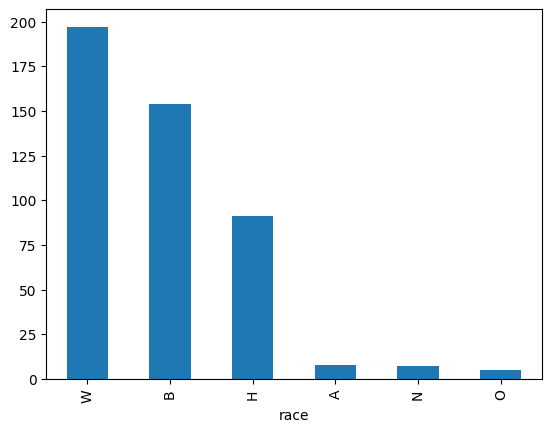

In [21]:
unarmed_pivot.plot(kind="bar")

In [22]:
shootings_df['date'] = pd.to_datetime(shootings_df['date'])  
shootings_df['year'] = shootings_df['date'].dt.year 
shootings_df

,date,armed_with,city,state,name,age,gender,race,agency_ids,year
id,,,,,,,,,,
3,2015-01-02,gun,Shelton,WA,Tim Elliot,53.0,male,A,73,2015
4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47.0,male,W,70,2015
5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,238,2015
8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32.0,male,W,196,2015
9,2015-01-04,other,Evans,CO,Michael Rodriguez,39.0,male,H,473,2015
...,...,...,...,...,...,...,...,...,...,...
9142,2023-04-19,gun,Bristol,TN,Casey Eric Crowley,48.0,male,W,2408,2023
9151,2023-04-19,gun,Kansas City,MO,Reginald E. Byers Jr.,43.0,male,B,201,2023
9152,2023-04-20,gun,Indianapolis,IN,Daniel Yefter Ghebrehiwet,46.0,male,B,13886,2023


In [36]:
mn_shootings_year = shootings_df.loc[shootings_df['state'] == 'MN'] 
mn_shootings_year

,date,armed_with,city,state,name,age,gender,race,agency_ids,year
id,,,,,,,,,,
60,2015-01-15,gun,Bloomington,MN,Quincy Reed Reindl,24.0,male,W,139,2015
324,2015-01-26,gun,New Hope,MN,Raymond Kmetz,68.0,male,W,1953;109,2015
212,2015-03-16,gun,St. Paul,MN,Justin Tolkinen,28.0,male,W,63,2015
670,2015-07-23,unarmed,Plymouth,MN,Derek Wolfsteller,31.0,male,W,672,2015
762,2015-08-22,gun,Cohasset,MN,Adam Schneider,31.0,male,W,737,2015
...,...,...,...,...,...,...,...,...,...,...
7993,2022-04-28,undetermined,Bowlus,MN,Charles Bangs,59.0,male,W,3442;3443,2022
8234,2022-07-13,undetermined,Minneapolis,MN,Andrew Tekle Sundberg,20.0,male,B,109,2022
8289,2022-07-30,blunt_object,Rochester,MN,Joshua Hippler,27.0,male,W,1494,2022


In [37]:
il_shootings_year = shootings_df.loc[shootings_df['state'] == 'IL'] 
il_shootings_year

,date,armed_with,city,state,name,age,gender,race,agency_ids,year
id,,,,,,,,,,
42,2015-01-11,gun,Arcola,IL,Tommy Smith,39.0,male,W,290,2015
196,2015-03-02,gun,Joilet,IL,Shaquille Barrow,20.0,male,B,244,2015
286,2015-04-02,gun,Rock Island,IL,Darrin Langford,32.0,male,B,40,2015
288,2015-04-02,gun,Metropolis,IL,Donald Hicks,63.0,male,W,41;42;43,2015
296,2015-04-04,gun,Zion,IL,Justus Howell,17.0,male,B,75,2015
...,...,...,...,...,...,...,...,...,...,...
8283,2022-07-25,gun,Fulton County,IL,Jeremiah C. Jones,38.0,male,W,2933,2022
8421,2022-09-08,gun,Zion,IL,George Franklin III,47.0,male,B,75,2022
8481,2022-10-03,gun,Peoria,IL,Samuel Vincent Richmond,59.0,male,B,1889,2022


In [39]:
mn_shootings_year = mn_shootings_year.pivot_table(columns="year", values = "race", aggfunc='count')
mn_shootings_year

year,2015,2016,2017,2018,2019,2020,2021,2022
race,10,14,9,12,11,8,11,8


In [40]:
il_shootings_year = il_shootings_year.pivot_table(columns="year", values = "race", aggfunc='count')
il_shootings_year

year,2015,2016,2017,2018,2019,2020,2021,2022
race,21,25,16,18,10,13,27,11


<Axes: >

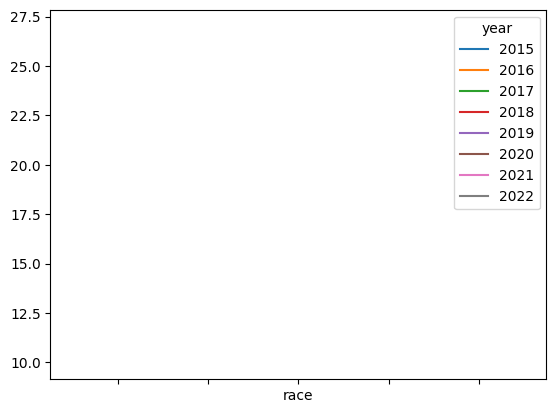

In [41]:
il_shootings_year.plot()